# Team Project: Predicting in What Way a Mask is Worn

The main purpose of this project is to predict how a mask is worn. The model and insight from this project is meant to help business assess whether a mask is being worn correctly or not; therefore, informing them about the safety of the location. This is especially useful now, during the coronavirus pandemic when many locations require masks and do not have an efficient way of checking whether customers are abiding to this rule.

Link to public dataset: https://ieee-dataport.org/open-access/ways-wear-mask-or-respirator-wwmr-db

Link to google drive folder including dataset: https://drive.google.com/drive/folders/1NGtIAtk0_8ZXTG1oP7fGDyiQ9f6cNwQL?usp=sharing

Team Members: Maria Stella Vardanega, Lujain Alqassar, Deniz Ipek Ozakyol, Mu-Hua (Rochel) Chan

## Part 1: Importing and Formatting the Data

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Loading and importing all necessary packages
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import glob
from PIL import Image

In [ ]:
basePath = 'drive/MyDrive/BA865/Team_Project_BA865/img_final' #Stella

image_size = (200,200)

In [ ]:
# Reading the images in each of the separate files for the different categories of mask-wearing.
labels = []
def read_images(imageType):
  image_list = []
  for file in glob.glob(f"{basePath}/{imageType}/*"):
    im=Image.open(file)
    im=im.resize(size=image_size)
    im=im.rotate(90) #After initial import we noticed the images were not imported straight therefore we are rotating them
    image_list.append(np.divide(np.array(im),255))
    labels.append(str(imageType))
  return np.stack(image_list)

MRCW = read_images('MRCW')
MRFH = read_images('MRFH')
MRHN = read_images('MRHN')
MRNC = read_images('MRNC')
MRNN = read_images('MRNN')
MRNW = read_images('MRNW')
MSFC = read_images('MSFC')
NRTN = read_images('NRTN')

The labels for our model are defined as the following:
* Mask Or Respirator Not Worn (MRNW)
* Mask Or Respirator Correctly Worn (MRCW)
* Mask Or Respirator Under The Nose (MRNN)
* Mask Or Respirator Under The Chin (MRNC)
* Mask Or Respirator Hanging From An Ear (MRHN)
* Mask Or Respirator On The Tip Of The Nose (NRTN)
* Mask Or Respirator On The Forehead (MRFH)
* Mask Folded Above The Chin (MSFC)

### A First Glance of our Dataset - Descriptive Analysis
Here we checked if all the groups of images were correctly named and whether they looked accurate. We also checked for class imbalance.

(152, 200, 200, 3)


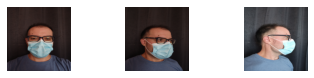

In [ ]:
for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(MRCW[i])
    plt.axis("off")
print(MRCW.shape)

(152, 200, 200, 3)


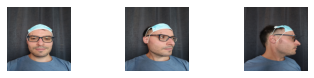

In [ ]:
for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(MRFH[i])
    plt.axis("off")
print(MRFH.shape)

(241, 200, 200, 3)


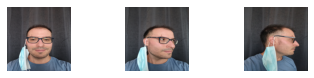

In [ ]:
for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(MRHN[i])
    plt.axis("off")
print(MRHN.shape)

(152, 200, 200, 3)


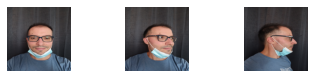

In [ ]:
for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(MRNC[i])
    plt.axis("off")
print(MRNC.shape)

(152, 200, 200, 3)


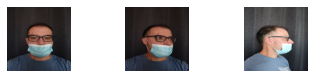

In [ ]:
for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(MRNN[i])
    plt.axis("off")
print(MRNN.shape)

(110, 200, 200, 3)


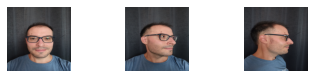

In [ ]:
for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(MRNW[i])
    plt.axis("off")
print(MRNW.shape)

(108, 200, 200, 3)


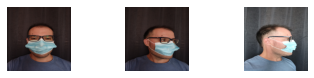

In [ ]:
for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(MSFC[i])
    plt.axis("off")
print(MSFC.shape)

(152, 200, 200, 3)


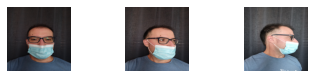

In [ ]:
for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(NRTN[i])
    plt.axis("off")
print(NRTN.shape)

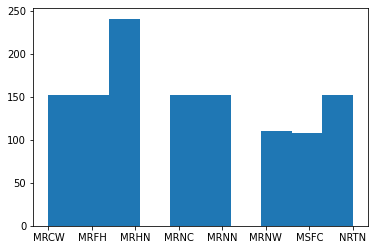

In [ ]:
plt.hist(labels);

In the graph above we were checking for class imbalance. We can see that there are different numbers of observations for most classes. Therefore, we decided to fix the class imbalance by assigning weights to each class according to the number of observations present.

## Part 2: Preparing the Data for the Neural Network Model
The first thing we did was combine all the various images, separated by labels, into a single image dataset. This was done so as to avoid feeding extra information into the model by separating the images by the target labels. Subsequently, we dummified the label array, which would later allow us to use the Softmax activation function. Afterwards, we calculated each class weight. Finally, we shuffled the indices and split the data into train and test.

In [ ]:
# Combining all the images together
mask_data = np.vstack([MRCW, MRFH, MRHN, MRNC, MRNN, MRNW, MSFC, NRTN])

In [ ]:
# Checking the shape of the dataset to make sure it was combined well
mask_data.shape

(1219, 200, 200, 3)

In [ ]:
# Transformed and dummifies the label array
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
# Converted integers to dummy variables (i.e. one hot encoded)
dummy_labels = np_utils.to_categorical(encoded_labels)

In [ ]:
# Checking to make sure that all the labels were there
encoder.classes_

array(['MRCW', 'MRFH', 'MRHN', 'MRNC', 'MRNN', 'MRNW', 'MSFC', 'NRTN'],
      dtype='<U4')

In [ ]:
dummy_labels.shape

(1219, 8)

In [ ]:
dummy_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
# Calculated each class weight
from sklearn.utils import class_weight

class_series = np.argmax(dummy_labels, axis=1)
class_labels = np.unique(class_series)
weight = class_weight.compute_class_weight(class_weight='balanced', classes=class_labels, y=class_series)
weight = {i : weight[i] for i in range(8)}

In [ ]:
weight

{0: 1.002467105263158,
 1: 1.002467105263158,
 2: 0.6322614107883817,
 3: 1.002467105263158,
 4: 1.002467105263158,
 5: 1.3852272727272728,
 6: 1.4108796296296295,
 7: 1.002467105263158}

In [ ]:
# Shuffled our dataset to make sure that it is randomly distributed
shuffled_indices= np.arange(mask_data.shape[0])
np.random.shuffle(shuffled_indices)

mask_data = mask_data[shuffled_indices]
dummy_labels = dummy_labels[shuffled_indices]

In [ ]:
dummy_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### Splitting our Data into Train and Test:
We split our data into an 80/20 split where 80% of the data was for training and 20% went to testing.

In [ ]:
from sklearn.model_selection import train_test_split
mask_train, mask_test, label_train, label_test = train_test_split(mask_data, dummy_labels, test_size=0.2, random_state=42)

In [ ]:
print(mask_train.shape)
print(label_train.shape)
print(mask_test.shape)
print(label_test.shape)

(975, 200, 200, 3)
(975, 8)
(244, 200, 200, 3)
(244, 8)


## Part 3: Creating the CNN Model


### Training the Model
After defining the model we used cross-validation as a way to ensure the model was not overfitting. After the model was trained we graphed both the training and validation loss to see if the model was learning at an acceptable rate and to ensure it was not overfitting.

Some things we included in our model are:


1.   Dropout layer --> To prevent overfitting
2.   Loss metric as categorical cross entropy --> Because it is the best one to use for multi-class classification tasks.
3. SeLu and ReLu activation functions --> Both enable deep neural networks and SeLu specficially can self-normalize as well. 



In [ ]:
from tensorflow import keras 
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

In [ ]:
def build_model():
    # Defining the layers
    input = layers.Input(shape=(mask_train.shape[1],mask_train.shape[2],mask_train.shape[3]), name="Mask")
    x = layers.Conv2D(filters=32, kernel_size=3, activation="selu")(input)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=32, kernel_size=3, activation="selu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Conv2D(filters=32, kernel_size=3, activation="selu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)

    x = layers.GlobalMaxPooling2D()(x)

    x = layers.Dense(64,activation='relu')(x)
    output = layers.Dense(8,activation = 'softmax')(x)

    model = keras.Model(inputs=input,outputs=output)
    
    model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

    return model

Processing fold #: 0
Epoch 1/15
65/65 [==============================] - 14s 49ms/step - loss: 2.1500 - accuracy: 0.1064 - val_loss: 2.0818 - val_accuracy: 0.1128
Epoch 2/15
65/65 [==============================] - 2s 36ms/step - loss: 2.1013 - accuracy: 0.1077 - val_loss: 2.0883 - val_accuracy: 0.0513
Epoch 3/15
65/65 [==============================] - 2s 35ms/step - loss: 2.1005 - accuracy: 0.1167 - val_loss: 2.0903 - val_accuracy: 0.1231
Epoch 4/15
65/65 [==============================] - 2s 35ms/step - loss: 2.1017 - accuracy: 0.1179 - val_loss: 2.0880 - val_accuracy: 0.0513
Epoch 5/15
65/65 [==============================] - 2s 35ms/step - loss: 2.0974 - accuracy: 0.1282 - val_loss: 2.0845 - val_accuracy: 0.0513
Epoch 6/15
65/65 [==============================] - 2s 37ms/step - loss: 2.0972 - accuracy: 0.0987 - val_loss: 2.0779 - val_accuracy: 0.1487
Epoch 7/15
65/65 [==============================] - 2s 35ms/step - loss: 2.0947 - accuracy: 0.1167 - val_loss: 2.0930 - val_accuracy

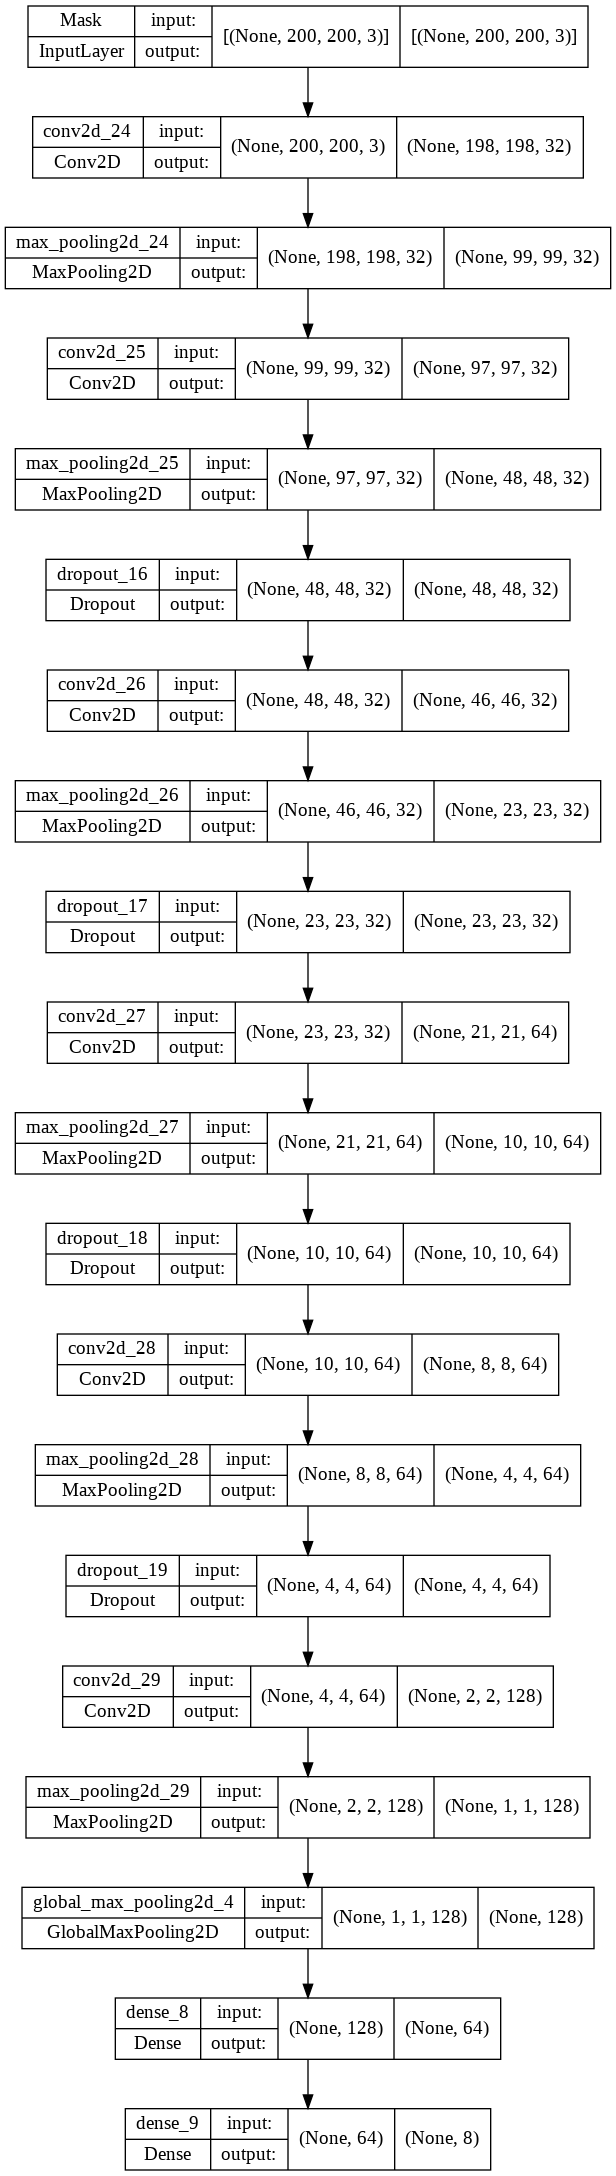

In [ ]:
# 5-fold Cross Validation
folds = 5
num_val_samples = len(mask_train) // folds
num_epochs = 15
batch_sizes = 12
all_train_mae_histories, all_val_mae_histories = [],[]  

for i in range(folds):
    print("Processing fold #:",i)

    # Created validation datasets for each branch
    val_mask_data = mask_train[i * num_val_samples: (i + 1) * num_val_samples] 

    val_targets = label_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train = np.concatenate(
        [mask_train[:i * num_val_samples],
         mask_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [label_train[:i * num_val_samples],
         label_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()

    history = model.fit(x=partial_train, y=partial_train_targets,
                        validation_data=(val_mask_data, val_targets),
                        epochs=num_epochs, batch_size=batch_sizes, class_weight = weight)
    
    train_mae_history = history.history['loss']
    val_mae_history = history.history['val_loss']

    all_train_mae_histories.append(train_mae_history)
    all_val_mae_histories.append(val_mae_history)

average_train_mae_history = [np.mean([x[i] for x in all_train_mae_histories]) for i in range(num_epochs)]
average_val_mae_history = [np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]

model.summary()
keras.utils.plot_model(model, show_shapes=True)

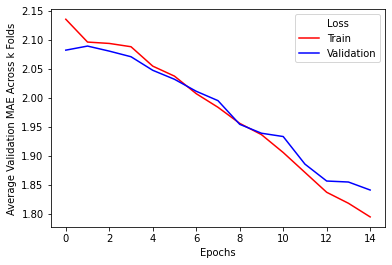

In [ ]:
import matplotlib.pyplot as plt

plt.plot(average_train_mae_history, c="r")
plt.plot(average_val_mae_history,c="b")
plt.legend(['Train','Validation'],title="Loss")
plt.xlabel("Epochs")
plt.ylabel("Average Validation MAE Across k Folds")
plt.show()

We can see from the model that the MAE has been decreasing with the increase of epochs, with validation and train being very similar in values throughout each epoch.

### Testing the Model

In [ ]:
result = model.evaluate(mask_test, label_test)
result

8/8 [==============================] - 1s 58ms/step - loss: 1.8524 - accuracy: 0.2090


[1.8523591756820679, 0.20901639759540558]

After testing our model, we end up getting a test accuracy of approximately 20.9% and a loss of 1.85.

## Part 4: LIME Image Explainer

In [ ]:
# Importing and loading the lime package
try:
  import lime
  from lime import lime_image
except ImportError as error:
  !pip install lime
  import lime 
  from lime import lime_image

predictions = model.predict(mask_test)
print(predictions)

     |████████████████████████████████| 275 kB 12.1 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=f397f3043558daafb0b882a1fc84d3bdaaadbba7b44eee5f5199094d3c8744bf
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
[[0.12827234 0.08051214 0.12557718 ... 0.13219531 0.10265186 0.13919896]
 [0.08364648 0.16834462 0.17887941 ... 0.21137832 0.05419355 0.08040558]
 [0.13375428 0.12333718 0.11260884 ... 0.11371258 0.14032367 0.13007686]
 ...
 [0.03834157 0.21812296 0.18730223 ... 0.3426762  0.01687955 0.04289368]
 [0.05942825 0.2299313  0.19361919 ... 0.16613777 0.03866395 0.06771639]
 [0.04974881 0.21011886 0.1844289  ... 0.3013501  0.02690338 0.05196539]]


  0%|          | 0/1000 [00:00<?, ?it/s]

The rank ordering of most probable labels for this image is as follows: [3, 4, 7, 5, 0, 2, 6, 1].


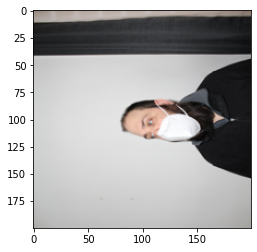

In [ ]:
try:
  from skimage.segmentation import mark_boundaries
except ImportError as error:
  !pip install skimage 
  from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

# Instantiating our LIME explainer
explainer = lime_image.LimeImageExplainer()

# Using it to explain our first test image
explanation = explainer.explain_instance(mask_test[0], model.predict, num_samples=1000, top_labels=8)

print(f'The rank ordering of most probable labels for this image is as follows: {explanation.top_labels}.')

plt.imshow(mask_test[0])
plt.show()

LIME gave us the the rank ordering of most probable labels for this image. It indicated that label 3 (MRHN) is our most probable label. MRHN indicates a mask hanging from one ear. We can see from the image that it is not correct. The second most probable label is 4 (MRNN). It means that a mask is under the nose and that is the correct label for the first image.



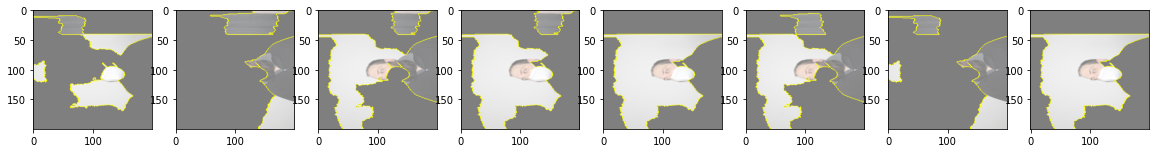

In [ ]:
# Here we are showing how the LIME package could have mistaken the most probable label for the image.
figure, axes = plt.subplots(nrows=1, ncols=8)

for i in range(8):
    label = explanation.top_labels[i]
    temp, mask = explanation.get_image_and_mask(label, positive_only=True, hide_rest=True)
    axes[label].imshow(mark_boundaries(temp / 2 + 0.5, mask))

figure.set_figheight(20)
figure.set_figwidth(20)

## Part 5: Implementing Pretrained Models

We decided to implement some pretrained models in addition to the model that we built in order to better compare how our model evalutes the data in comparison to others.

We used two pretrained models:

1.   ResNet50
2.   VVG16

After implementing the models, we saw that both pretrained models gave us similar results, with a testing loss of approximately 2.08. The loss is only slightly higher than our model's testing loss, which was around 1.90.

### ResNet50

#### Training the Model

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image

In [ ]:
model = ResNet50(weights='imagenet', include_top=False)
print(model.summary())

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                          

In [ ]:
def pretrained(ImageGroup):
  image_preprocessed = []
  for i in range(len(ImageGroup)):
    img_data = preprocess_input(ImageGroup[i])
    image_preprocessed.append(img_data)
  resnet50_feature = model.predict(np.stack(image_preprocessed))
  return resnet50_feature

pretrained_mask_resnet = pretrained(mask_train)
pretrained_mask_resnet_test = pretrained(mask_test)

print(pretrained_mask_resnet.shape)
print(pretrained_mask_resnet_test.shape)
print(label_train.shape)

(975, 7, 7, 2048)
(244, 7, 7, 2048)
(975, 8)


In [ ]:
def pretrained_model_resnet():
    # Defining the layers
    input = layers.Input(shape=(pretrained_mask_resnet.shape[1],pretrained_mask_resnet.shape[2],pretrained_mask_resnet.shape[3]), name="Mask")

    x = layers.GlobalMaxPooling2D()(input)

    x = layers.Dense(256,activation='selu')(x)
    x = layers.Dense(128,activation='selu')(x)
    x = layers.Dense(64,activation='relu')(x)
    output = layers.Dense(8,activation = 'softmax')(x)

    model_resnet = keras.Model(inputs=input,outputs=output)
    
    model_resnet.compile(optimizer='adam', loss="categorical_crossentropy")

    return model_resnet

In [ ]:
# 5-fold Cross Validation
folds = 5
num_val_samples = len(pretrained_mask_resnet) // folds
num_epochs = 20
batch_sizes = 12
all_train_mae_histories, all_val_mae_histories = [],[]  

for i in range(folds):
    print("Processing fold #:",i)

    # Creating validation datasets for each branch
    val_mask_data = pretrained_mask_resnet[i * num_val_samples: (i + 1) * num_val_samples] 

    val_targets = label_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train = np.concatenate(
        [pretrained_mask_resnet[:i * num_val_samples],
         pretrained_mask_resnet[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [label_train[:i * num_val_samples],
         label_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = pretrained_model_resnet()

    history = model.fit(x=partial_train, y=partial_train_targets,
                        validation_data=(val_mask_data, val_targets),
                        epochs=num_epochs, batch_size=batch_sizes, class_weight = weight)
    
    train_mae_history = history.history['loss']
    val_mae_history = history.history['val_loss']

    all_train_mae_histories.append(train_mae_history)
    all_val_mae_histories.append(val_mae_history)

average_train_mae_history = [np.mean([x[i] for x in all_train_mae_histories]) for i in range(num_epochs)]
average_val_mae_history = [np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]

Processing fold #: 0
Epoch 1/20
65/65 [==============================] - 1s 10ms/step - loss: 2.9109 - val_loss: 2.4441
Epoch 2/20
65/65 [==============================] - 0s 7ms/step - loss: 2.3362 - val_loss: 2.1811
Epoch 3/20
65/65 [==============================] - 0s 6ms/step - loss: 2.2363 - val_loss: 2.3034
Epoch 4/20
65/65 [==============================] - 0s 8ms/step - loss: 2.1822 - val_loss: 2.1994
Epoch 5/20
65/65 [==============================] - 0s 7ms/step - loss: 2.1227 - val_loss: 2.1453
Epoch 6/20
65/65 [==============================] - 0s 7ms/step - loss: 2.1192 - val_loss: 2.0689
Epoch 7/20
65/65 [==============================] - 1s 8ms/step - loss: 2.0944 - val_loss: 2.0821
Epoch 8/20
65/65 [==============================] - 1s 8ms/step - loss: 2.0946 - val_loss: 2.0867
Epoch 9/20
65/65 [==============================] - 1s 8ms/step - loss: 2.0953 - val_loss: 2.0834
Epoch 10/20
65/65 [==============================] - 0s 6ms/step - loss: 2.0940 - val_loss: 2.08

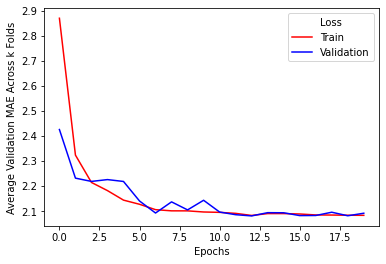

In [ ]:
plt.plot(average_train_mae_history, c="r")
plt.plot(average_val_mae_history,c="b")
plt.legend(['Train','Validation'],title="Loss")
plt.xlabel("Epochs")
plt.ylabel("Average Validation MAE Across k Folds")
plt.show()

#### Testing the model

In [ ]:
result_pretrained_resnet = model.evaluate(pretrained_mask_resnet_test, label_test)
result_pretrained_resnet

8/8 [==============================] - 0s 10ms/step - loss: 2.0846


2.084616184234619

After testing our model, we end up getting a test loss of 2.08.

### VVG16

#### Training the Model

In [ ]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

In [ ]:
model = VGG16(weights='imagenet', include_top=False)
print(model.summary())

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [ ]:
def pretrained(ImageGroup):
  image_preprocessed = []
  for i in range(len(ImageGroup)):
    img_data = preprocess_input(ImageGroup[i])
    image_preprocessed.append(img_data)
  vgg16_feature = model.predict(np.stack(image_preprocessed))
  return vgg16_feature

pretrained_mask_vvg = pretrained(mask_train)
pretrained_mask_vvg_test = pretrained(mask_test)

print(pretrained_mask_vvg.shape)
print(pretrained_mask_vvg_test.shape)
print(label_train.shape)

(975, 6, 6, 512)
(244, 6, 6, 512)
(975, 8)


In [ ]:
def pretrained_model_vvg():
    # Defining the layers
    input = layers.Input(shape=(pretrained_mask_vvg.shape[1],pretrained_mask_vvg.shape[2],pretrained_mask_vvg.shape[3]), name="Mask")

    x = layers.GlobalMaxPooling2D()(input)

    x = layers.Dense(256,activation='selu')(x)
    x = layers.Dense(128,activation='selu')(x)
    x = layers.Dense(64,activation='relu')(x)
    output = layers.Dense(8,activation = 'softmax')(x)

    model_pretrained_vvg = keras.Model(inputs=input,outputs=output)
    
    model_pretrained_vvg.compile(optimizer='adam', loss="categorical_crossentropy")

    return model_pretrained_vvg

In [ ]:
# 5-fold Cross Validation
folds = 5
num_val_samples = len(pretrained_mask_vvg) // folds
num_epochs = 10
batch_sizes = 6
all_train_mae_histories, all_val_mae_histories = [],[]  

for i in range(folds):
    print("Processing fold #:",i)

    # Creating validation datasets for each branch
    val_mask_data = pretrained_mask_vvg[i * num_val_samples: (i + 1) * num_val_samples] 

    val_targets = label_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train = np.concatenate(
        [pretrained_mask_vvg[:i * num_val_samples],
         pretrained_mask_vvg[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [label_train[:i * num_val_samples],
         label_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = pretrained_model_vvg()

    history = model.fit(x=partial_train, y=partial_train_targets,
                        validation_data=(val_mask_data, val_targets),
                        epochs=num_epochs, batch_size=batch_sizes, class_weight = weight)
    
    train_mae_history = history.history['loss']
    val_mae_history = history.history['val_loss']

    all_train_mae_histories.append(train_mae_history)
    all_val_mae_histories.append(val_mae_history)

average_train_mae_history = [np.mean([x[i] for x in all_train_mae_histories]) for i in range(num_epochs)]
average_val_mae_history = [np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]

Processing fold #: 0
Epoch 1/10
130/130 [==============================] - 1s 6ms/step - loss: 2.9000 - val_loss: 2.4961
Epoch 2/10
130/130 [==============================] - 1s 4ms/step - loss: 2.4701 - val_loss: 2.2466
Epoch 3/10
130/130 [==============================] - 1s 5ms/step - loss: 2.2180 - val_loss: 2.0648
Epoch 4/10
130/130 [==============================] - 1s 5ms/step - loss: 2.2251 - val_loss: 2.1759
Epoch 5/10
130/130 [==============================] - 1s 5ms/step - loss: 2.1777 - val_loss: 2.1640
Epoch 6/10
130/130 [==============================] - 1s 5ms/step - loss: 2.1373 - val_loss: 2.1877
Epoch 7/10
130/130 [==============================] - 1s 5ms/step - loss: 2.1272 - val_loss: 2.1216
Epoch 8/10
130/130 [==============================] - 1s 4ms/step - loss: 2.1190 - val_loss: 2.1345
Epoch 9/10
130/130 [==============================] - 1s 4ms/step - loss: 2.1045 - val_loss: 2.0816
Epoch 10/10
130/130 [==============================] - 1s 5ms/step - loss: 2.09

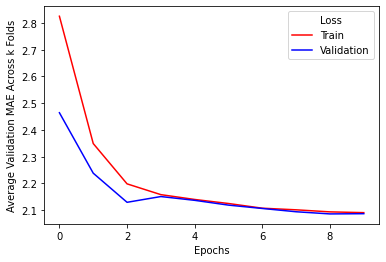

In [ ]:
plt.plot(average_train_mae_history, c="r")
plt.plot(average_val_mae_history,c="b")
plt.legend(['Train','Validation'],title="Loss")
plt.xlabel("Epochs")
plt.ylabel("Average Validation MAE Across k Folds")
plt.show()

#### Testing the Model

In [ ]:
result_pretrained_vvg = model.evaluate(pretrained_mask_vvg_test, label_test)
result_pretrained_vvg

8/8 [==============================] - 0s 5ms/step - loss: 2.0842


2.084181785583496

After testing our model, we end up getting a test loss of 2.08.

## Part 6: Moving Forward

In moving forward with this project, there are many things that we can look at to better our model's prediction performance. 

Some of these things are:


*   Getting More Data: 

    We have a limited amount of data in our image file and most of those images were posed. We first need to get a lot more images and specifically have more varying images, such as in different angles and distances away from the where the picture was taken. 

*   Increase Performance Accuracy:

    Currently our performance accuracy is very low, at around 20%. The model needs to be continuously updated and improved to better increase model performance. 

